<a href="https://colab.research.google.com/github/Claudia-Cabrera/machine-learning-for-business-analytics/blob/main/NASCAR_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries & mount to google drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import data
nascar_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/nascar_data.csv')

# view data
nascar_data.head()

,Driver,Points,Poles,Wins,Top5,Top10,Winnings ($)
0,Tony Stewart,2403,1,5,9,19,6.53
1,Carl Edwards,2403,3,1,19,26,8.49
2,Kevin Harvick,2345,0,4,9,19,6.20
3,Matt Kenseth,2330,3,3,12,20,6.18
4,Brad Keselowski,2319,1,3,10,14,5.09


In [ ]:
# drop non-numeric columns & clean up column names
nascar_data_regression = nascar_data.drop(columns= ["Driver"])
nascar_data_regression.columns= nascar_data_regression.columns.str.lower()
nascar_data_regression = nascar_data_regression.rename(columns={"winnings ($)": "winnings"})

# view data
print(nascar_data_regression)

    points  poles  wins  top5  top10  winnings
0     2403      1     5     9     19      6.53
1     2403      3     1    19     26      8.49
2     2345      0     4     9     19      6.20
3     2330      3     3    12     20      6.18
4     2319      1     3    10     14      5.09
5     2304      0     2    14     21      6.30
6     2290      1     0     4     12      4.16
7     2287      1     3    13     18      5.91
8     2284      0     1     5     14      5.40
9     2284      3     1     9     17      5.30
10    2262      3     2     8     16      5.94
11    2246      1     4    14     18      6.16
12    1047      0     1     4     16      5.63
13    1041      2     1     8     15      4.78
14    1013      0     0     1     10      4.83
15     997      3     0     3     10      4.32
16     947      0     1     4      8      3.85
17     937      1     0     3     12      3.96
18     936      0     1     5     12      4.75
19     935      0     0     2      5      3.81
20     932   

In [ ]:
# summary stats
print(nascar_data_regression.describe())

            points      poles       wins       top5      top10   winnings
count    35.000000  35.000000  35.000000  35.000000  35.000000  35.000000
mean   1304.200000   0.942857   1.000000   5.114286  10.228571   4.706286
std     766.567705   1.109925   1.393261   4.861441   7.145899   1.288321
min     192.000000   0.000000   0.000000   0.000000   0.000000   2.270000
25%     807.500000   0.000000   0.000000   1.500000   4.500000   3.870000
50%     937.000000   1.000000   0.000000   4.000000  10.000000   4.580000
75%    2284.000000   2.000000   1.000000   8.500000  16.000000   5.515000
max    2403.000000   3.000000   5.000000  19.000000  26.000000   8.490000


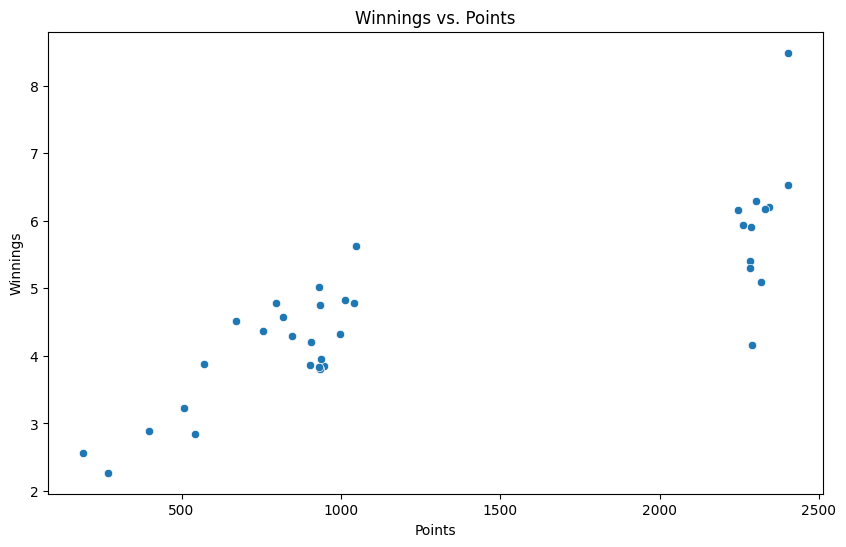

In [ ]:
# Scatterplot winnings vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='points', y='winnings', data=nascar_data_regression)
plt.title('Winnings vs. Points')
plt.xlabel('Points')
plt.ylabel('Winnings')
plt.show()

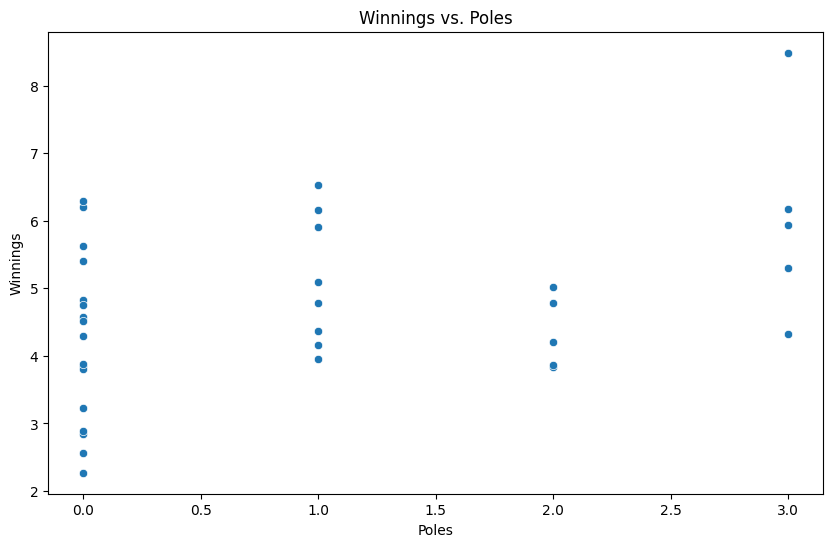

In [ ]:
# scatterplot of winnings vs. poles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='poles', y='winnings', data=nascar_data_regression)
plt.title('Winnings vs. Poles')
plt.xlabel('Poles')
plt.ylabel('Winnings')
plt.show()

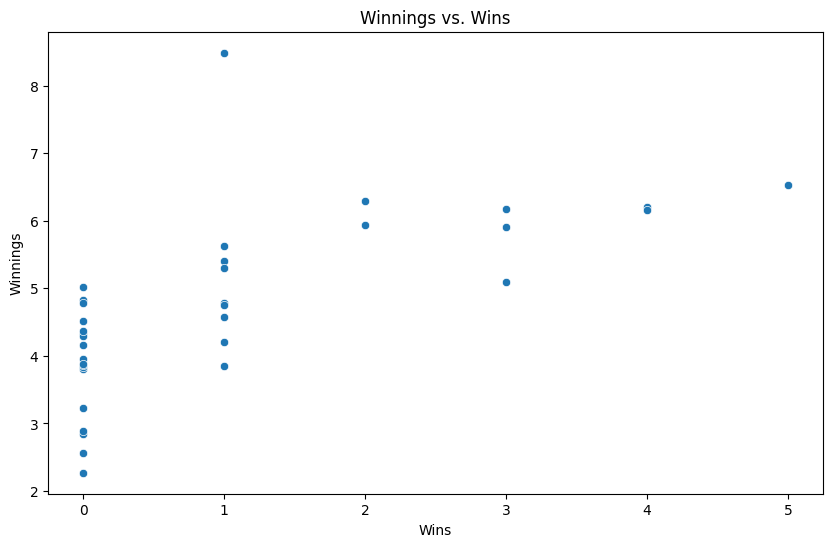

In [ ]:
# scatterplot of winnings vs. wins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wins', y='winnings', data=nascar_data_regression)
plt.title('Winnings vs. Wins')
plt.xlabel('Wins')
plt.ylabel('Winnings')
plt.show()

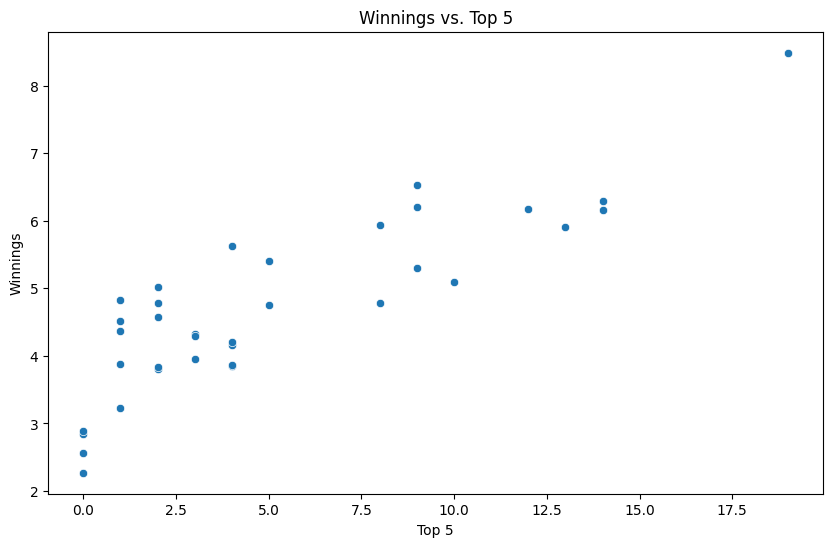

In [ ]:
# scatterplot of winnings vs. top5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='top5', y='winnings', data=nascar_data_regression)
plt.title('Winnings vs. Top 5')
plt.xlabel('Top 5')
plt.ylabel('Winnings')
plt.show()

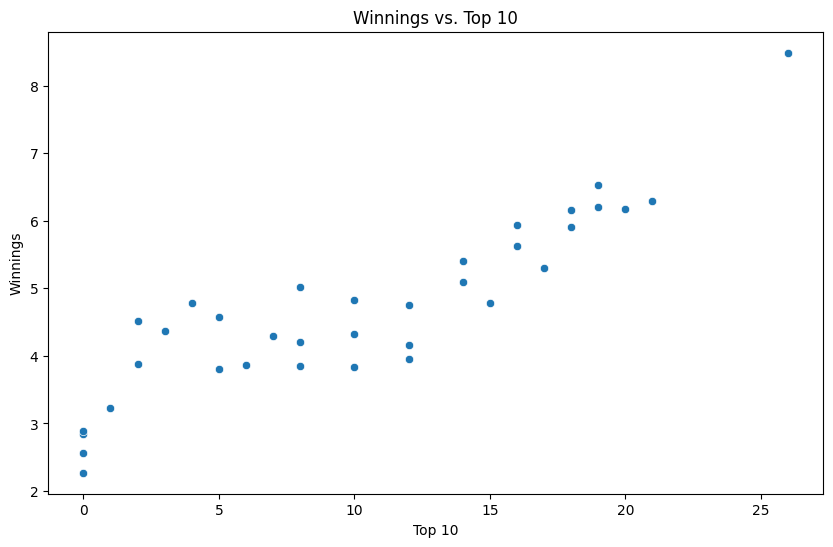

In [ ]:
# scatterplot of winnings vs. top 10
plt.figure(figsize=(10, 6))
sns.scatterplot(x='top10', y='winnings', data=nascar_data_regression)
plt.title('Winnings vs. Top 10')
plt.xlabel('Top 10')
plt.ylabel('Winnings')
plt.show()

          points  poles  wins  top5  top10  winnings
points      1.00   0.39  0.75  0.85   0.88      0.82
poles       0.39   1.00  0.13  0.44   0.46      0.41
wins        0.75   0.13  1.00  0.73   0.70      0.66
top5        0.85   0.44  0.73  1.00   0.90      0.86
top10       0.88   0.46  0.70  0.90   1.00      0.90
winnings    0.82   0.41  0.66  0.86   0.90      1.00


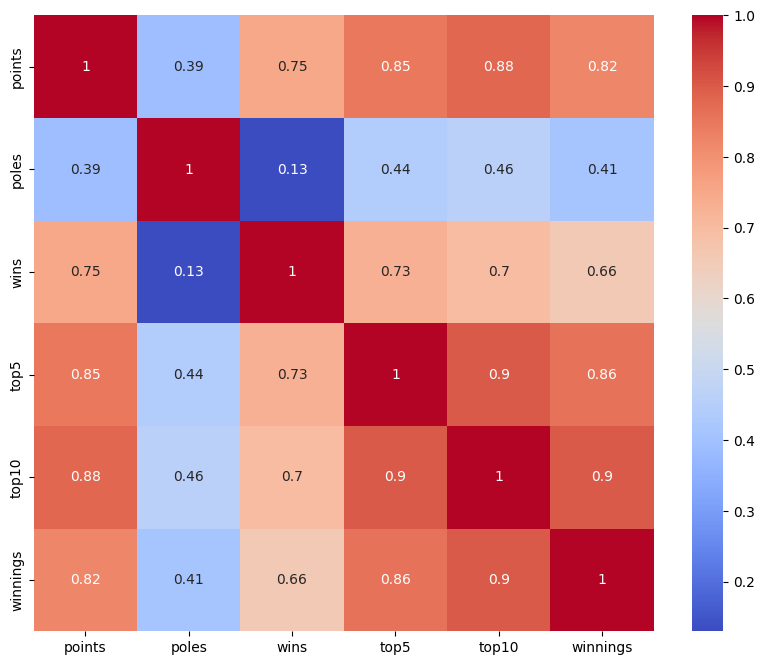

In [ ]:
# Correlation Matrix
cormat = nascar_data_regression.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

print(cormat)

# Plot of Correlation Matrix
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

In [ ]:
# Fit Full Model
x = nascar_data_regression.drop(columns= ['winnings'])
y = nascar_data_regression['winnings']
x = sm.add_constant(x)
fullreg = sm.OLS(y,x).fit()

# display regression summary
print(fullreg.summary())

                            OLS Regression Results                            
Dep. Variable:               winnings   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     26.57
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           5.32e-10
Time:                        19:45:42   Log-Likelihood:                -27.934
No. Observations:                  35   AIC:                             67.87
Df Residuals:                      29   BIC:                             77.20
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1134      0.227     13.701      0.0

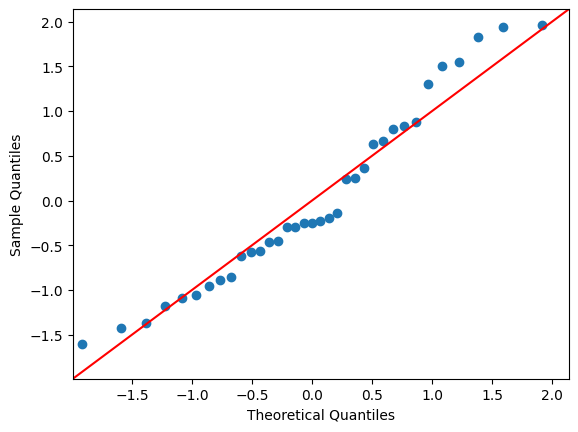

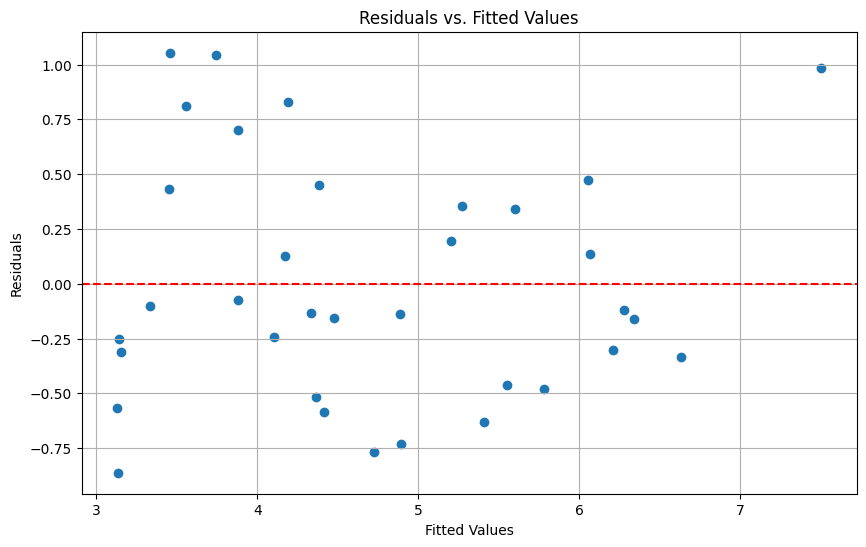

In [ ]:
# Calc residuals
residuals = fullreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(fullreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
# remove wins from the model bc highest p-value
# Fit model
x = nascar_data_regression.drop(columns= ['winnings', 'wins'])
y = nascar_data_regression['winnings']
x = sm.add_constant(x)
reg1 = sm.OLS(y,x).fit()

# display regression summary
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               winnings   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     34.35
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           8.39e-11
Time:                        19:45:46   Log-Likelihood:                -27.935
No. Observations:                  35   AIC:                             65.87
Df Residuals:                      30   BIC:                             73.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1117      0.215     14.455      0.0

In [ ]:
# remove poles (highest p-value)
x = nascar_data_regression.drop(columns= ['winnings', 'wins', 'poles'])
y = nascar_data_regression['winnings']
x = sm.add_constant(x)
reg2 = sm.OLS(y,x).fit()
# display regression summary
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               winnings   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     47.28
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.12e-11
Time:                        19:45:46   Log-Likelihood:                -27.949
No. Observations:                  35   AIC:                             63.90
Df Residuals:                      31   BIC:                             70.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1067      0.210     14.824      0.0

In [ ]:
# remove points from the model
x = nascar_data_regression.drop(columns= ['winnings', 'wins', 'poles', 'points'])
y = nascar_data_regression['winnings']
x = sm.add_constant(x)
reg3 = sm.OLS(y,x).fit()

# display regression summary
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:               winnings   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     73.01
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.19e-12
Time:                        19:45:48   Log-Likelihood:                -27.990
No. Observations:                  35   AIC:                             61.98
Df Residuals:                      32   BIC:                             66.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1362      0.176     17.811      0.0

In [ ]:
x = nascar_data_regression['top10']
y = nascar_data_regression['winnings']
x = sm.add_constant(x)
reg4 = sm.OLS(y,x).fit()

# display regression summary
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:               winnings   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     137.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           2.74e-13
Time:                        19:45:50   Log-Likelihood:                -29.337
No. Observations:                  35   AIC:                             62.67
Df Residuals:                      33   BIC:                             65.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0508      0.172     17.765      0.0

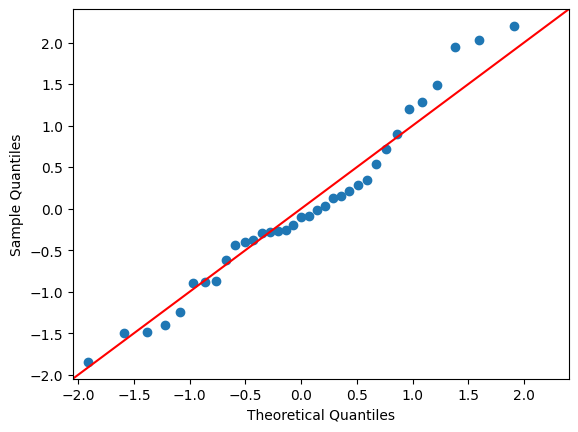

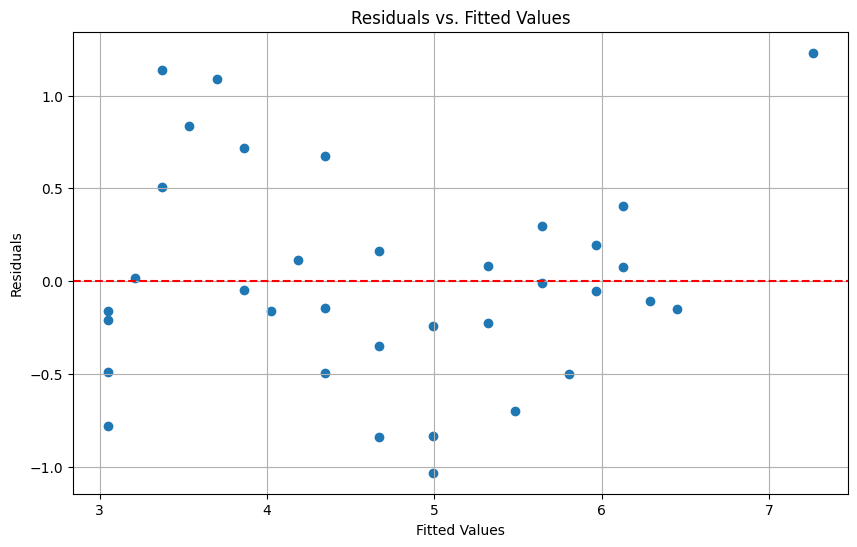

In [ ]:
# Calc residuals
final_residuals = reg4.resid

# Generate Q-Q Plot
fig = sm.qqplot(final_residuals, fit=True, line='45')
plt.show()

# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(reg4.fittedvalues, final_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()



---
**Looking at Model 3**


*   top 5
*   top 10

---
This model is much simpler than the full model
with only 2 predictors (top5 & top 10) compared to five. All models have roughly the same R squared value, but a simpler model with only 2 predicitors, has a higher adjusted R squared value (.809) than the full model (.790) indicating this model has a better model fit. Additionally, the p-value for both predictors decreased slightly from their p-value in the full model. I would consider this model the best due to it having the highest adjusted R squared value and it is a much more parsimonous model than the full one. It is worth noting top 5 has a p-value greater than 0.05 indicating it is not a significant predictor of winnings. However, the adjusted R squared value decreases without this predictor.


In [ ]:
x = nascar_data_regression.drop(columns= ['winnings', 'wins', 'poles', 'points'])
y = nascar_data_regression['winnings']
x = sm.add_constant(x)
final_reg_model = sm.OLS(y,x).fit()

# display regression summary
print(final_reg_model.summary())

NameError: name 'nascar_data_regression' is not defined

In [ ]:
# Calc residuals
residuals = final_reg_model.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(final_reg_model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

NameError: name 'final_reg_model' is not defined

# **Advice to NASCAR Driver**

**Model 3**
```
# y =  3.1362 +  0.0735(Top5) + 0.1168(Top10)
```
- Prioritize finishing in the top 5 or 10 in races rather than scoring a higher number of points, number of poles won, or  winning more races.

- For every 1 more race in top 5 they will earn 73,500 more & for every 1 more race they finish in the top 10 they will earn $116,800 more dollars



**Model 4**
```
# y = B0 +  0.1618(Top10)
```
- advise them to prioritize finishing in the top 10 in races rather than anything else.

- for every 1 more race they finish in the top 10 they can expect to make
$161,800 more dollars.



# **Predicting Winnings **

- Suppose that a driver has 22 top 10 finishes, 13 top 5 finishes, 3 wins, and no poles with a total of 2345 points for the season.  How much should he expect to win?

```
# y = 3.3.0508 +  0.1618(Top10)

```








In [ ]:
3.30508 + 0.1618* (22)

6.86468